<a href="https://colab.research.google.com/github/tung134245/ANN/blob/main/ANN_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount = True)

Mounted at /content/gdrive


In [2]:
%cd '/content/gdrive/My Drive/DeepLearning/Chapter3/Data/'

/content/gdrive/My Drive/DeepLearning/Chapter3/Data


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
df = pd.read_csv("Churn_Modelling.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [9]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

In [10]:

df_y = pd.DataFrame(df.Exited.value_counts())
df_y

,Exited
0,7963
1,2037


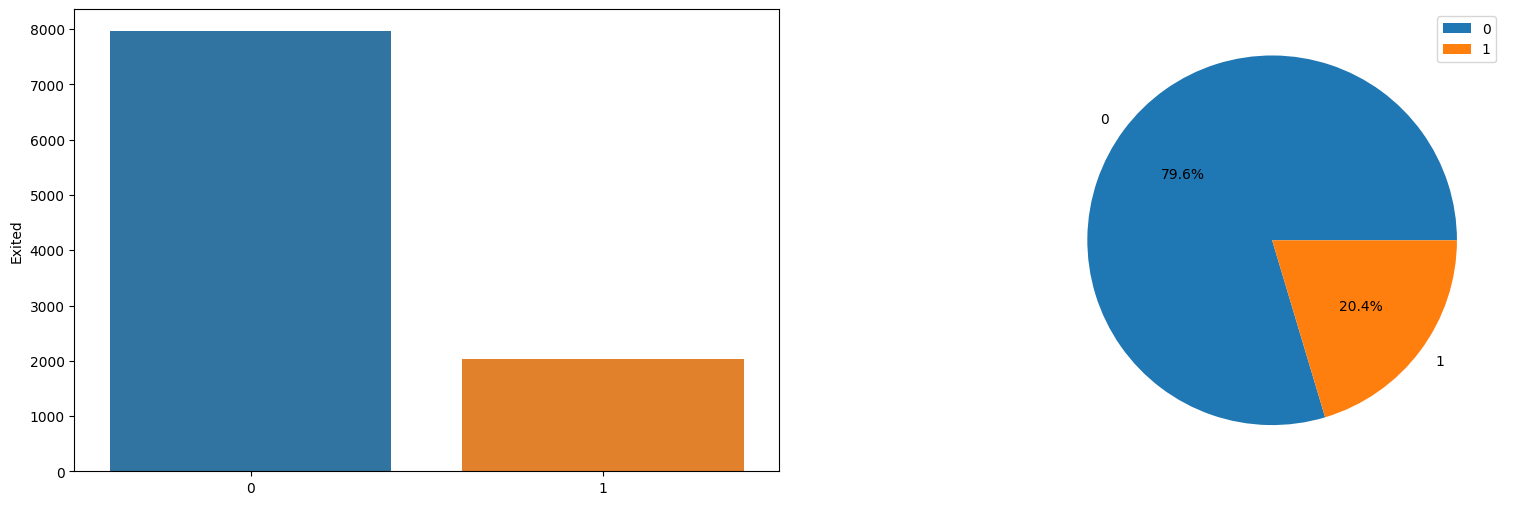

In [11]:
import seaborn as sns
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
sns.barplot(data = df_y, x = df_y.index, y = df_y.Exited)
plt.subplot(1,2,2)
plt.pie(df_y.Exited, labels = df_y.index, autopct='%1.1f%%')
plt.legend()

In [12]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [13]:
X_ = X[['Geography',	'Gender']]
X = X. drop(['Geography',	'Gender'], axis = 1)
X_ = pd.get_dummies(X_, drop_first=True)
X = pd.concat([X_, X], axis = 1)
X

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,0,0,619,42,2,0.00,1,1,1,101348.88
1,0,1,0,608,41,1,83807.86,1,0,1,112542.58
2,0,0,0,502,42,8,159660.80,3,1,0,113931.57
3,0,0,0,699,39,1,0.00,2,0,0,93826.63
4,0,1,0,850,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,771,39,5,0.00,2,1,0,96270.64
9996,0,0,1,516,35,10,57369.61,1,1,1,101699.77
9997,0,0,0,709,36,7,0.00,1,0,1,42085.58
9998,1,0,1,772,42,3,75075.31,2,1,0,92888.52


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)
X_train

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
4901,0,0,1,673,59,0,178058.06,2,0,1,21063.71
4375,1,0,1,850,41,8,60880.68,1,1,0,31825.84
6698,0,0,0,725,31,6,0.00,1,0,0,61326.43
9805,0,0,1,644,33,7,174571.36,1,0,1,43943.09
1101,0,1,1,703,29,9,0.00,2,1,0,50679.48
...,...,...,...,...,...,...,...,...,...,...,...
5734,0,0,1,768,54,8,69712.74,1,1,1,69381.05
5191,0,0,0,682,58,1,0.00,1,1,1,706.50
5390,0,0,0,735,38,1,0.00,3,0,0,92220.12
860,0,0,1,667,43,8,190227.46,1,1,0,97508.04


In [15]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import Sequential
classifier = Sequential()

In [16]:
classifier.add(Dense(units = 16, activation='relu', input_dim = 11))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 16,
                activation='relu'))
classifier.add(Dropout(rate=0.1))
classifier.add(Dense(units = 1,
                activation='sigmoid'))

In [17]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                192       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dropout_1 (Dropout)         (None, 16)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 481 (1.88 KB)
Trainable params: 481 (1.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

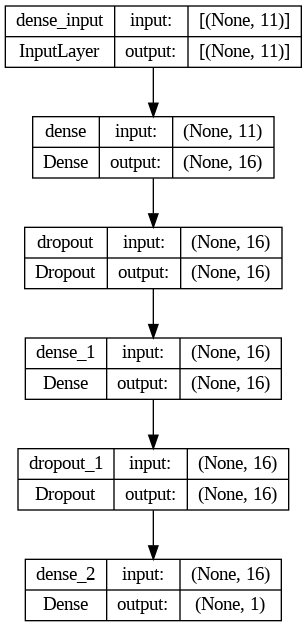

In [19]:
from tensorflow.keras.utils import plot_model
from IPython.display import Image

plot_model(classifier, to_file='ANN_model.png', show_shapes=True)
Image(filename='ANN_model.png')

In [20]:
history = classifier.fit(X_train, y_train,
                         epochs = 100,
                         batch_size=32,
                         validation_data= (X_test, y_test))

Epoch 1/100
235/235 [==============================] - 5s 9ms/step - loss: 1390.6550 - accuracy: 0.6612 - val_loss: 126.0729 - val_accuracy: 0.8012
Epoch 2/100
235/235 [==============================] - 3s 13ms/step - loss: 388.7871 - accuracy: 0.6585 - val_loss: 46.4490 - val_accuracy: 0.7068
Epoch 3/100
235/235 [==============================] - 3s 13ms/step - loss: 130.2216 - accuracy: 0.6559 - val_loss: 7.5054 - val_accuracy: 0.7928
Epoch 4/100
235/235 [==============================] - 2s 9ms/step - loss: 50.6244 - accuracy: 0.6627 - val_loss: 1.9934 - val_accuracy: 0.7944
Epoch 5/100
235/235 [==============================] - 2s 10ms/step - loss: 25.8601 - accuracy: 0.6769 - val_loss: 0.9412 - val_accuracy: 0.6072
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 13.6206 - accuracy: 0.6968 - val_loss: 0.8735 - val_accuracy: 0.5292
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 8.9267 - accuracy: 0.7155 - val_loss: 0.8286 - val_

<Axes: >

<Figure size 2000x600 with 0 Axes>

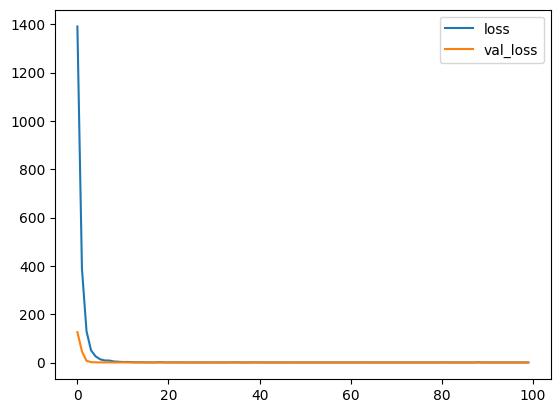

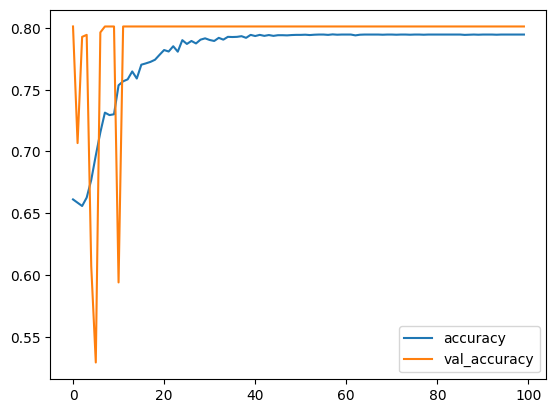

In [21]:
history_df = pd.DataFrame(history.history)
plt.figure(figsize = (20, 6))
history_df[['loss', 'val_loss']].plot()
history_df[['accuracy', 'val_accuracy']].plot()

In [22]:
y_pred = classifier.predict(X_test)
y_pred = y_pred >= 0.5
#y_pred

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
matrix = confusion_matrix(y_test, y_pred)
print(matrix)

79/79 [==============================] - 0s 1ms/step
[[2003    0]
 [ 497    0]]


In [23]:
matrix

array([[2003,    0],
       [ 497,    0]])

## Dùng RandomOverSampler


In [24]:
from imblearn.over_sampling import RandomOverSampler
sm = RandomOverSampler(random_state = 0)
X_resample, y_resample = sm.fit_resample(X, y)


In [25]:
y_resample.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X_resample, y_resample,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy',
                  metrics=['accuracy'])

In [ ]:
history1 = classifier.fit(X1_train, y1_train,
                         epochs = 100,
                         batch_size=32,
                         validation_data= (X1_test, y1_test))

Epoch 1/100
374/374 [==============================] - 3s 6ms/step - loss: 0.8658 - accuracy: 0.4962 - val_loss: 0.8070 - val_accuracy: 0.5113
Epoch 2/100
374/374 [==============================] - 2s 5ms/step - loss: 0.7891 - accuracy: 0.4962 - val_loss: 0.7498 - val_accuracy: 0.5113
Epoch 3/100
374/374 [==============================] - 1s 3ms/step - loss: 0.7454 - accuracy: 0.4962 - val_loss: 0.7171 - val_accuracy: 0.5113
Epoch 4/100
374/374 [==============================] - 1s 3ms/step - loss: 0.7838 - accuracy: 0.4962 - val_loss: 0.7012 - val_accuracy: 0.5113
Epoch 5/100
374/374 [==============================] - 1s 3ms/step - loss: 0.7106 - accuracy: 0.4961 - val_loss: 0.6949 - val_accuracy: 0.5113
Epoch 6/100
374/374 [==============================] - 1s 3ms/step - loss: 0.6956 - accuracy: 0.4961 - val_loss: 0.6931 - val_accuracy: 0.5113
Epoch 7/100
374/374 [==============================] - 1s 3ms/step - loss: 0.8247 - accuracy: 0.4963 - val_loss: 0.6929 - val_accuracy: 0.5113

In [ ]:
history1_df = pd.DataFrame(history1.history)
history1_df.plot()

## Dùng RandomUnderSampler


In [ ]:
from imblearn.under_sampling import RandomUnderSampler
cc = RandomUnderSampler(random_state=0)
X2_resample2, y2_resample = cc.fit_resample(X,y)

In [ ]:
y2_resample.value_counts()

In [ ]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_resample2, y2_resample,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [ ]:
history2 = classifier.fit(X2_train, y2_train,
                         epochs = 100,
                         batch_size=32,
                         validation_data= (X2_test, y2_test))

In [ ]:
history2_df = pd.DataFrame(history2.history)
history2_df.plot()